# Process ilan_shop_review.csv

## Convert timestamp for review into day, year, month

In [2]:
import pandas as pd
import numpy as np

In [4]:
rdf=pd.read_csv("sample_data/ilan_shop_review.csv")

In [5]:
rdf.head()

,reviewId,shopId,reviewAuthor,reviewDatetime
0,1503206,84984,焦糖曼曼,2017-09-30 16:14:58
1,1366907,84984,迷籠的貓,2017-04-17 08:29:38
2,1043870,84984,Austin 貍,2016-05-31 05:41:05
3,974444,84984,哈拉摩卡,2016-01-06 02:50:46
4,892176,84984,luckbear,2015-07-29 12:00:02


In [7]:
#Create new column timestamp
rdf['reviewTimestamp']=rdf['reviewId']
rdf['reviewTimestamp']=''
rdf['year']=rdf['reviewId']
rdf['year']=1
rdf['month']=rdf['reviewId']
rdf['month']=1
rdf['day']=rdf['reviewId']
rdf['day']=1

In [8]:
#extract year, month, day
from datetime import datetime
for i in range(len(rdf)):
    date=datetime.strptime(rdf['reviewDatetime'][i],'%Y-%m-%d %H:%M:%S')
    rdf.loc[i,'year']=date.year
    rdf.loc[i,'month']=date.month
    rdf.loc[i,'day']=date.day

In [11]:
rdf.head()

,reviewId,shopId,reviewAuthor,reviewDatetime,reviewTimestamp,year,month,day
0,1503206,84984,焦糖曼曼,2017-09-30 16:14:58,,2017,9,30
1,1366907,84984,迷籠的貓,2017-04-17 08:29:38,,2017,4,17
2,1043870,84984,Austin 貍,2016-05-31 05:41:05,,2016,5,31
3,974444,84984,哈拉摩卡,2016-01-06 02:50:46,,2016,1,6
4,892176,84984,luckbear,2015-07-29 12:00:02,,2015,7,29


In [12]:
#create makte timestamp here
import time
for i in range(len(rdf)):
    dt=datetime.strptime(rdf['reviewDatetime'][i],'%Y-%m-%d %H:%M:%S')
    rdf.loc[i,'reviewTimestamp']=time.mktime(dt.timetuple())

In [13]:
rdf.head()

,reviewId,shopId,reviewAuthor,reviewDatetime,reviewTimestamp,year,month,day
0,1503206,84984,焦糖曼曼,2017-09-30 16:14:58,1.50676e+09,2017,9,30
1,1366907,84984,迷籠的貓,2017-04-17 08:29:38,1.49239e+09,2017,4,17
2,1043870,84984,Austin 貍,2016-05-31 05:41:05,1.46464e+09,2016,5,31
3,974444,84984,哈拉摩卡,2016-01-06 02:50:46,1.45202e+09,2016,1,6
4,892176,84984,luckbear,2015-07-29 12:00:02,1.43814e+09,2015,7,29


In [15]:
# demo rating with SDRate, SDDelicious,SDServiceRate,SDEvironmentRate before having the real rating
rdf['SDRate']=rdf['reviewId']
rdf['SDRate']=''
rdf['SDDelicious']=rdf['reviewId']
rdf['SDDelicious']=1
rdf['SDServiceRate']=rdf['reviewId']
rdf['SDServiceRate']=1
rdf['SDEnvironment']=rdf['reviewId']
rdf['SDEnvironment']=1

In [16]:
#set random variable from 1 to 5 in SDDelicious,SDServiceRate,SDEvironmentRate, SDRate is the average of other 3
import random
for i in range(len(rdf)):
    rdf.loc[i,'SDDelicious']=random.randint(1,5)
    rdf.loc[i,'SDServiceRate']=random.randint(1,5)
    rdf.loc[i,'SDEnvironment']=random.randint(1,5)

In [17]:
for i in range(len(rdf)):
    average=(rdf.loc[i,'SDDelicious']+rdf.loc[i,'SDServiceRate']+rdf.loc[i,'SDEnvironment'])/3
    rdf.loc[i,'SDRate']=round(average)

In [18]:
rdf.head()

,reviewId,shopId,reviewAuthor,reviewDatetime,reviewTimestamp,year,month,day,SDRate,SDDelicious,SDServiceRate,SDEnvironment
0,1503206,84984,焦糖曼曼,2017-09-30 16:14:58,1.50676e+09,2017,9,30,5,5,5,5
1,1366907,84984,迷籠的貓,2017-04-17 08:29:38,1.49239e+09,2017,4,17,2,1,3,3
2,1043870,84984,Austin 貍,2016-05-31 05:41:05,1.46464e+09,2016,5,31,4,5,2,4
3,974444,84984,哈拉摩卡,2016-01-06 02:50:46,1.45202e+09,2016,1,6,3,4,2,4
4,892176,84984,luckbear,2015-07-29 12:00:02,1.43814e+09,2015,7,29,2,2,2,3


In [19]:
#write to csv file then
rdf.to_csv("ilan_shop_review2.csv",encoding="utf-8")

---

# Process ilan_shop_detail.csv 

# Extract Area to Division

In [3]:
df=pd.read_csv("ilan_shop_detail_clean.csv")

In [4]:
df.head()

,Unnamed: 0,id,shopId,shopLatitude,shopLongitude,SDCategory,SDConsumption,SDTelephone,SDAddress,SDRate,SDRateCount,SDWatchCount,SDBookmarkCount,SDDeliciousRate,SDServiceRate,SDEnvRate,shopName
0,0,1,84984,24.756402,121.757506,其他小吃,114.0,03-936-9007,宜蘭縣宜蘭市新民路31號,45,22,287550,148,18,14,13,大成羊排麵-牛肉麵
1,1,2,40797,24.676926,121.763772,休閒零食,178.0,03-954-9881,宜蘭縣羅東鎮純精路二段130號,45,135,4134237,104,16,16,15,宜蘭餅食品公司
2,2,3,28880,24.754241,121.747397,麵食點心,67.0,03-932-5641,宜蘭縣宜蘭市泰山路25號之1(光復國小對面),45,139,448930,801,17,12,9,正好鮮肉小籠包-原-正常鮮肉小籠包
3,3,4,123235,24.753671,121.750560,其它中式料理,862.0,03-910-1011,宜蘭縣宜蘭市民權路二段36號六樓,45,145,432831,663,17,15,15,蘭城晶英酒店-紅樓中餐廳
4,4,5,33031,24.682477,121.771274,其他小吃,40.0,03-955-2736,宜蘭縣羅東鎮中正北路109號,45,169,273977,385,13,9,8,林場肉羹


In [5]:
df['Division']=df['shopName']
df['Division']=""

In [6]:
for i in range(len(df)):
    df.loc[i,'Division']=df.loc[i,'SDAddress'][3:6]

In [7]:
df.head()

,Unnamed: 0,id,shopId,shopLatitude,shopLongitude,SDCategory,SDConsumption,SDTelephone,SDAddress,SDRate,SDRateCount,SDWatchCount,SDBookmarkCount,SDDeliciousRate,SDServiceRate,SDEnvRate,shopName,Division
0,0,1,84984,24.756402,121.757506,其他小吃,114.0,03-936-9007,宜蘭縣宜蘭市新民路31號,45,22,287550,148,18,14,13,大成羊排麵-牛肉麵,宜蘭市
1,1,2,40797,24.676926,121.763772,休閒零食,178.0,03-954-9881,宜蘭縣羅東鎮純精路二段130號,45,135,4134237,104,16,16,15,宜蘭餅食品公司,羅東鎮
2,2,3,28880,24.754241,121.747397,麵食點心,67.0,03-932-5641,宜蘭縣宜蘭市泰山路25號之1(光復國小對面),45,139,448930,801,17,12,9,正好鮮肉小籠包-原-正常鮮肉小籠包,宜蘭市
3,3,4,123235,24.753671,121.750560,其它中式料理,862.0,03-910-1011,宜蘭縣宜蘭市民權路二段36號六樓,45,145,432831,663,17,15,15,蘭城晶英酒店-紅樓中餐廳,宜蘭市
4,4,5,33031,24.682477,121.771274,其他小吃,40.0,03-955-2736,宜蘭縣羅東鎮中正北路109號,45,169,273977,385,13,9,8,林場肉羹,羅東鎮


In [39]:
df.loc[df['Division']=='e']

,id,shopId,shopLatitude,shopLongitude,SDCategory,SDConsumption,SDTelephone,SDAddress,SDRate,SDRateCount,SDWatchCount,SDBookmarkCount,SDDeliciousRate,SDServiceRate,SDEnvRate,shopName,Division
564,565,73013,24.757583,121.752822,其他小吃,139.0,03-936-6556,None,45,23,91380,67,15,10,8,宜蘭廟口紅槽魷魚,e


In [43]:
area=list(df["Division"].unique())

In [8]:
df.to_csv("ilan_shop_detail2.csv",encoding="utf-8")

## Another table for Category

In [35]:
rdf=pd.read_csv("sample_data/ilan_shop_detail.csv")

In [36]:
#check for null value in the dataset
rdf.isnull().sum()

id                   0
shopId               0
shopLatitude         0
shopLongitude        0
SDCategory           1
SDConsumption      336
SDTelephone          0
SDAddress            0
SDRate               0
SDRateCount          0
SDWatchCount         0
SDBookmarkCount      0
SDDeliciousRate      0
SDServiceRate        0
SDEnvRate            0
shopName             0
dtype: int64

In [37]:
# check again for sure
rdf2=rdf.dropna()
rdf2.isnull().sum()

id                 0
shopId             0
shopLatitude       0
shopLongitude      0
SDCategory         0
SDConsumption      0
SDTelephone        0
SDAddress          0
SDRate             0
SDRateCount        0
SDWatchCount       0
SDBookmarkCount    0
SDDeliciousRate    0
SDServiceRate      0
SDEnvRate          0
shopName           0
dtype: int64

In [38]:
#save the clean state to another file
rdf2.to_csv("ilan_shop_clean.csv",encoding="utf8")

In [39]:
#format category
df=pd.read_csv("ilan_shop_clean.csv")
a=df['SDCategory']
for i in range(len(df)):
    b=a[i].split("、")
    for k in range (len(b)):
        print(df['shopId'][i],end=',',file=open("ilan_shop_categories.csv", "a",encoding='utf-8'))
        print(b[k],file=open("ilan_shop_categories.csv", "a",encoding='utf-8'))

---

# Review Distribution

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import py2neo
from py2neo import Graph, Node, Relationship

In [7]:
graph=Graph("localhost")

In [12]:
from pandas import DataFrame
query="""
    match (n:Restaurant)<-[:ABOUT]-(r:Review)
with n, count (r) as reviewCount
return n.shopId,reviewCount
"""
df=DataFrame(graph.data(query))

In [13]:
df.head()

,n.shopId,reviewCount
0,84984,16
1,40797,132
2,28880,106
3,123235,121
4,33031,127


In [32]:
df.hist(column='reviewCount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4310ECA20>]], dtype=object)

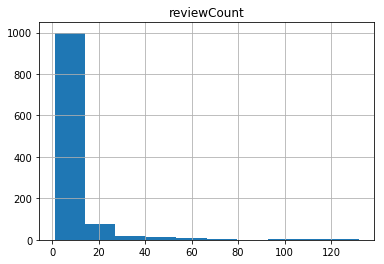

In [33]:
plt.show()

---

# Run Script for Top Month

In [36]:
import py2neo
from py2neo import Graph, Node, Relationship

In [37]:
graph=Graph("localhost")

In [38]:
query="""
//month_top
Match (res:Restaurant)-[:IN_DIVISION]->(area:Division),
(area)-[:IN_MONTH]->(m:Month),(res)<-[r:ABOUT]-(re:Review)-[:WRITTEN_IN]->(m)
where area.e_name={location} and m.month={month}
with res,m, count(r) as rs
with res, m order by rs desc limit 3
merge (m)-[:MONTH_TOP]->(res)
"""

In [42]:
a=graph.data("Match (n:Division) return n.e_name as location")
a[0]['location']

'宜蘭市'

In [46]:
for row in a:
    for i in range(1,13):
        graph.run(query,location=row['location'],month=i)

---

# Run Script for Top Place

In [48]:
import py2neo
from py2neo import Graph, Node, Relationship

graph=Graph("localhost")

query="""
match(res:Restaurant)-[:IN_DIVISION]->(area:Division),(res:Restaurant)<-[:ABOUT]-(r:Review)
where 2013<=r.year and 2018>=r.year and area.e_name={location}
with area,res,count(r) as reviewCount
with area,res,reviewCount order by reviewCount desc limit 5
match (res)-[:IN_DIVISION]->(area),(res)<-[:ABOUT]-(r:Review)
where 2013<=r.year and 2018>=r.year
with area,res,avg(r.SDRate) as avg
merge (res)<-[:TOP_PLACE{top_place:avg}]-(area)
"""
a=graph.data("Match (n:Division) return n.e_name as location")

for row in a:
    for i in range(1,13):
        graph.run(query,location=row['location'])

---

# Run Script create neighbor relationship

In [11]:
import py2neo
from py2neo import Graph, Node, Relationship

graph=Graph("localhost")

query="""
	match (n:Restaurant) return n.shopId as shopId
"""
restaurant=graph.data(query)
restaurant[0]['shopId']

84984

In [12]:
for row in restaurant:
	query1="""
		Match (n1:Restaurant)where n1.shopId={shopId}
        with (n1)
        match (n1)-[rel:RELATE]->(n2:Restaurant)
        with n1,n2,rel order by rel.common_au desc limit 10
        merge (n1)-[:NEIGHBOR{common_au:rel.common_au}]->(n2)
	"""
	graph.run(query,shopId=row['shopId'])